# Experiment to analyze the correlation between people without Hauptschul Degree and Special Education Needs

In [6]:
from school_analysis.preprocessing.load import Loader
import pandas as pd

loader = Loader()


def load_special_edu_support_percentage():
    students_special_support = loader.load('students_with_special_educational_support_no_gender')

    students_special_support['year'] = pd.to_datetime(students_special_support['year'], format='%Y')
    students_special_support['total'] = pd.to_numeric(students_special_support['total'], errors='coerce')
    total_over_years = students_special_support.groupby(['year','school'])['total'].sum()

    children_type = loader.load('school-children-by-type')
    children_type = children_type.rename(columns={'Year': 'year'})
    children_type = children_type.rename(columns={'School Type': 'school'})
    children_type = children_type.rename(columns={'Students': 'Value'})
    children_type['year'] = pd.to_datetime(children_type['year'], format='%Y')
    children_type['Value'] = pd.to_numeric(children_type['Value'], errors='coerce')
    child_amount_per_year = children_type.groupby(['year','school'])['Value'].sum()


    merged_df = pd.merge(total_over_years, child_amount_per_year,on=['year','school'])
    merged_df['edu_support_relative'] = merged_df['total']/merged_df['Value'] 
    return merged_df



def load_no_hauptschulabschluss_percentage(ignore_special_schools=False):
    students_no_hauptschul_degree = loader.load('no_hauptschulabschluss')
    if(ignore_special_schools):
        students_no_hauptschul_degree = students_no_hauptschul_degree[students_no_hauptschul_degree['school']!="Special schools"] #Drop special schools because they have special effects
    students_no_hauptschul_degree['year'] = pd.to_datetime(students_no_hauptschul_degree['year'], format='%Y')
    students_no_hauptschul_degree['total'] = pd.to_numeric(students_no_hauptschul_degree['total'], errors='coerce')
    total_students_by_year = students_no_hauptschul_degree.groupby(['year', 'school'])['total'].sum()

    children_type = loader.load('school-children-by-type')
    children_type = children_type.rename(columns={'Year': 'year'})
    children_type = children_type.rename(columns={'School Type': 'school'})
    children_type = children_type.rename(columns={'Students': 'Value'})
    children_type['year'] = pd.to_datetime(children_type['year'], format='%Y')
    children_type['Value'] = pd.to_numeric(children_type['Value'], errors='coerce')
    child_amount_per_year = children_type.groupby(['year','school'])['Value'].sum()

    merged_df = pd.merge(total_students_by_year, child_amount_per_year, on=['year','school'])
    merged_df['no_hauptschulabschluss_relative'] = merged_df['total']/merged_df['Value'] 
    return merged_df

no_hauptschulabschluss = load_no_hauptschulabschluss_percentage(True)
special_edu_support = load_special_edu_support_percentage()


## Comput coefficient of correlation

In [7]:
merged_df = pd.merge(no_hauptschulabschluss, special_edu_support, on=['year','school'])
correlation_coefficient = merged_df['edu_support_relative'].corr(merged_df['no_hauptschulabschluss_relative'])
correlation_coefficient

0.45155541416762934

## Visualize correlation

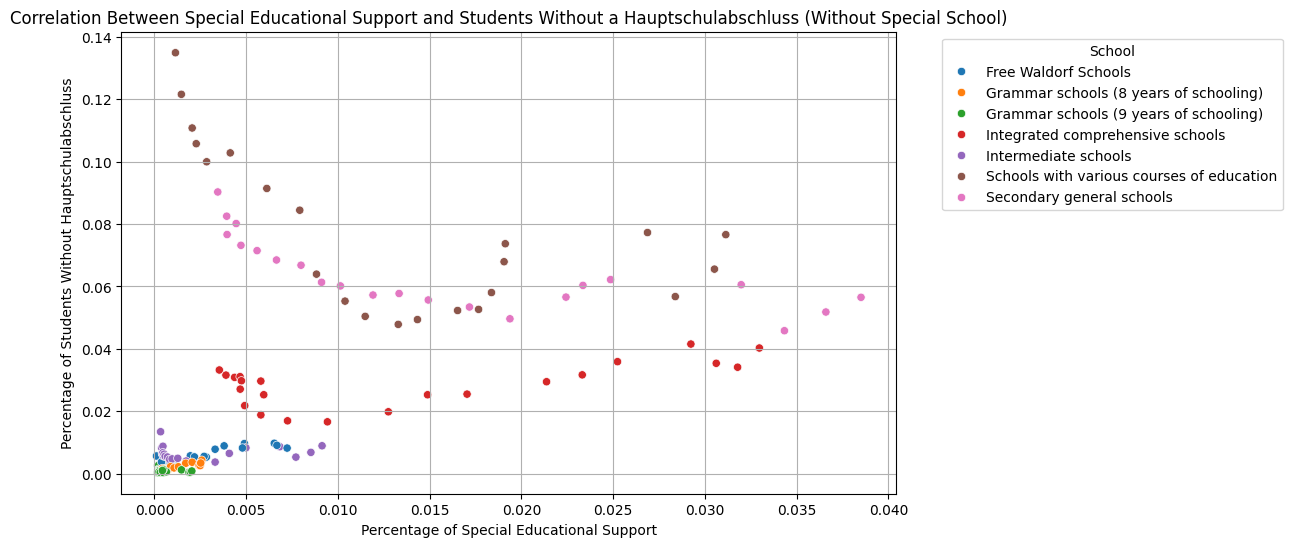

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='edu_support_relative', y='no_hauptschulabschluss_relative', hue='school')
plt.title('Correlation Between Special Educational Support and Students Without a Hauptschulabschluss (Without Special School)')
plt.xlabel('Percentage of Special Educational Support')
plt.ylabel('Percentage of Students Without Hauptschulabschluss')
plt.legend(title='School', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()